In [ ]:
pip install git+https://github.com/JustAnotherArchivist/snscrape.git

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /private/var/folders/34/mtw435zs29d_08f7638jrnv40000gp/T/pip-req-build-a1lt083q
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /private/var/folders/34/mtw435zs29d_08f7638jrnv40000gp/T/pip-req-build-a1lt083q
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit ed3ea944d177157d688786470c8369198b0ce8ce
  Preparing metadata (setup.py) ... done
  Created wheel for snscrape: filename=snscrape-0.4.3.20220107.dev45+ged3ea94-py3-none-any.whl size=67052 sha256=41bd1fc0b1446a80ee850a1f2993961724b6ce0224e5b7fce92038a774f1b0a2
  Stored in directory: /private/var/folders/34/mtw435zs29d_08f7638jrnv40000gp/T/pip-ephem-wheel-cache-xv033l2z/wheels/1a/ba/e2/39fa3a11802c4a622f2efc8be3f5ff854481051d0b4c95c1fd
Successfully built snscrape
  Attempting uninstall: snscrape
    Found existing installation: snscrape 0.4.3.20220106
    Uninstalling snscrape-0.4.3.2022

In [ ]:
pip install yfinance

  Using cached yfinance-0.1.70-py2.py3-none-any.whl (26 kB)
  Using cached multitasking-0.0.10-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.8/281.8 KB 5.7 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 KB 2.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-macosx_11_0_arm64.whl size=152177 sha256=5309be578e479465b18710502470624d0adfadc369252f667ad0709488bbdde2
  Stored in directory: /Users/rregi/Library/Caches/pip/wheels/f9/7a/dd/06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 KB 2.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 867.0 kB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import snscrape.modules.twitter as sntwitter
import yfinance as yf
import pandas as pd
import matplotlib as plt

In [ ]:
import sys
import re         # Imports regular expression operations
import string     # For string operations
import json
import os

In [ ]:
import nltk
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords            # module for stop words that come with nltk
from nltk.tokenize import word_tokenize      # module for tokenizing strings

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()

from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

from wordcloud import WordCloud

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rregi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/rregi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/rregi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/rregi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import config      #python file with API credentials for authentication

import tweepy
import requests
import matplotlib.pyplot as plt
import json
import boto3
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

In [ ]:
#Get stock data for the given Stock Name
def getStockDetails(stockname, start_time, end_time):
    company = yf.Ticker(stockname)
    company.info.get("longName")
    stockData = yf.download(stockname, start=start_time, end=end_time)
    print("\n Stock Data Obtained ")
    print(stockData.head())
    print("\n")
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(5)
    plt.title('Time series chart of Closing stocks for ' + company.info.get("longName"))
    plt.plot(stockData["Close"])
    plt.show()
    print("\n")
    stockData.to_csv('stockData_' + stockname + '.csv')

In [ ]:
def cleanTweets(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # removes @ mentions
    text = re.sub(r'#', '', text) # removes '#' symbol
    text = re.sub(r'RT[\s]+', '', text) # removing Retweet
    text = re.sub(r'https?:\/\/\S+', '', text) # removes hyperlink

    return text

def getTweets(stockname, query, limit):
    # Creating list to append tweet data to
    tweets = []

    # Using TwitterSearchScraper to scrape data and append tweets to list
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
        if i>limit:
            break
        tweets.append([tweet.date, tweet.id, tweet.content, tweet.user.username])

    # Creating a dataframe from the tweets list above
    tweets_df = pd.DataFrame(tweets, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
    return tweets_df

#print(getTweets('msft until:2022-01-01 since:2021-01-03').to_string())

Enter a valid STOCKNAME of the Corporation: AAPL
Enter the Start Date in the following format[YYYY-MM-DD]: 2022-04-12
Enter the End Date in the following format[YYYY-MM-DD]: 2022-04-24
------------------------------ Getting Stock details -----------------------------
[*********************100%***********************]  1 of 1 completed

 Stock Data Obtained 
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-04-12  168.020004  169.869995  166.639999  167.660004  167.414032   
2022-04-13  167.389999  171.039993  166.770004  170.399994  170.149994   
2022-04-14  170.619995  171.270004  165.039993  165.289993  165.047501   
2022-04-18  163.919998  166.600006  163.570007  165.070007  164.827835   
2022-04-19  165.020004  167.820007  163.910004  167.399994  167.154404   

              Volume  
Date                  
2022-04-12  79265200  
2022-04-13  70618900  
2022-04-14  75329400  
2022-0

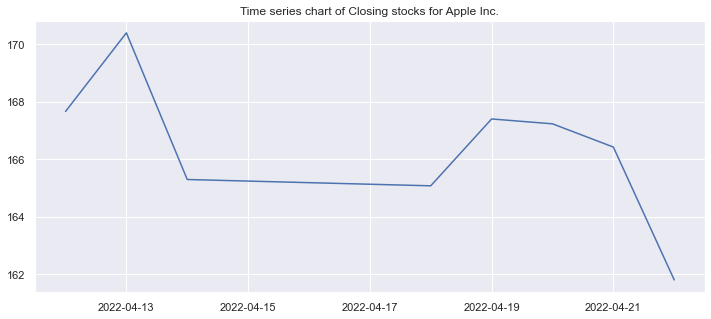





------------------------------ Getting Tweets -----------------------------
                     Datetime             Tweet Id  \
0   2022-04-23 23:58:39+00:00  1518016533754171393   
1   2022-04-23 23:58:29+00:00  1518016489575653381   
2   2022-04-23 23:58:23+00:00  1518016466179788802   
3   2022-04-23 23:57:04+00:00  1518016135106633731   
4   2022-04-23 23:56:17+00:00  1518015938528006144   
..                        ...                  ...   
96  2022-04-23 21:34:28+00:00  1517980247949721600   
97  2022-04-23 21:31:43+00:00  1517979557248311296   
98  2022-04-23 21:31:07+00:00  1517979404512776193   
99  2022-04-23 21:24:48+00:00  1517977817002254336   
100 2022-04-23 21:23:49+00:00  1517977566312808448   

                                                  Text         Username  
0    How come $AAPL hasn’t made an aggressive takeo...    CadBaneTrades  
1    Upcoming STOCK MARKET Plays #BigTech #options ...     dat_herb_tho  
2    @DrDividend47 $AAPL $XOM $GOOG $INTC. Intel 

In [ ]:
# Display both stock and twitter data
name = input("Enter a valid STOCKNAME of the Corporation: ") #enter the name of the company
start_date = input("Enter the Start Date in the following format[YYYY-MM-DD]: ") #enter the start date to fetch the tweets
end_date = input("Enter the End Date in the following format[YYYY-MM-DD]: " ) #enter the end date to fetch the tweets

if(len(name) > 0):
    STOCKNAME  = name
else:
    STOCKNAME = "AAPL"

if(len(start_date) > 0):
    start_time = start_date
else:
    start_time = "2018-01-01"

if(len(end_date) > 0):
    end_time = end_date
else:
    end_time = "2019-12-31"


#Get Stock Details
print("------------------------------ Getting Stock details -----------------------------")
stockData = getStockDetails(STOCKNAME, start_time, end_time)
print("\n")

#Get Tweets
print("------------------------------ Getting Tweets -----------------------------")
query = STOCKNAME + ' lang:en' + ' since:' + start_time +' until:' + end_time  # example - microsoft until:2022-01-01 since:2021-01-03
tweetData = getTweets(STOCKNAME, query, 100)
print(tweetData)

In [ ]:
tweetData.head()

,Datetime,Tweet Id,Text,Username
0,2022-04-11 23:59:59+00:00,1513668214990901250,Why? Because without P3s we wouldn’t have:\n\n...,nickebertram
1,2022-04-11 23:59:54+00:00,1513668192975085585,"@Tesla Didn't get to come out for it, unfortu...",TracyCagle14
2,2022-04-11 23:59:36+00:00,1513668116429119495,@MarketRebels Tsla long 950P last friday,frankiecooks
3,2022-04-11 23:59:27+00:00,1513668080605425667,@CodingMark @Tesla @elonmusk Make em faster ti...,amenpanesar
4,2022-04-11 23:59:24+00:00,1513668067796082690,@klwtts @Tesla @elonmusk @TeslaTruckClub @tesl...,hubb_kyle


In [ ]:
from textblob import TextBlob
from textblob import Word
# Lower casing and removing punctuations

tweetData['Text'] = tweetData['Text'].apply(lambda x: " ".join(x.lower() for
x in x.split()))
tweetData['Text'] = tweetData['Text'].str.replace('[^\w\s]', "")
tweetData.Text.head()

/var/folders/34/mtw435zs29d_08f7638jrnv40000gp/T/ipykernel_26091/555154497.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  tweetData['Text'] = tweetData['Text'].str.replace('[^\w\s]', "")


0    elon musk is a globalist technocrat dont let h...
1    dirtytesla tesla elonmusk for me this version ...
2    incognitobanski metaspaceperson debra_wick tes...
3    madaznfootballr how you short tsla my order ar...
4       cant wait for tsla split so that i can load up
Name: Text, dtype: object

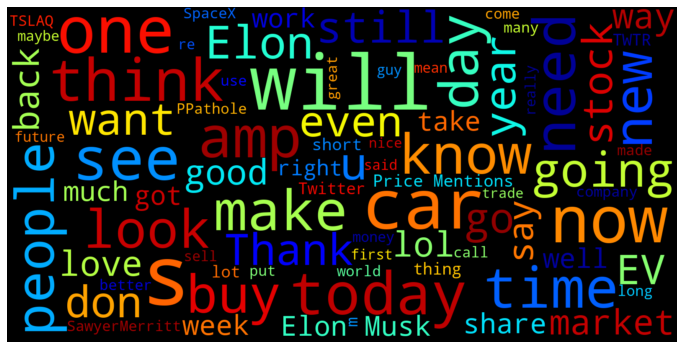

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    new_stopwords = ['https', 'co', 'QQQ', 'elonmusk', 'Tesla', 'TSLA', 't']
    stopwords.update(new_stopwords)
    new_stopwords_list = set(stopwords)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='black',
        stopwords=new_stopwords_list,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(tweetData['Text'])

In [ ]:
# Adding stock terms to vader to improve sentiment analysis, score: 4.0 to -4.0
new_words = {
    'citron': -4.0,
    'hidenburg': -4.0,
    'moon': 4.0,
    'highs': 2.0,
    'mooning': 4.0,
    'long': 2.0,
    'short': -2.0,
    'call': 4.0,
    'calls': 4.0,
    'put': -4.0,
    'puts': -4.0,
    'break': 2.0,
    'tendie': 2.0,
     'tendies': 2.0,
     'town': 2.0,
     'overvalued': -3.0,
     'undervalued': 3.0,
     'buy': 4.0,
     'sell': -4.0,
     'gone': -1.0,
     'gtfo': -1.7,
     'paper': -1.7,
     'bullish': 3.7,
     'bearish': -3.7,
     'bagholder': -1.7,
     'stonk': 1.9,
     'green': 1.9,
     'money': 1.2,
     'print': 2.2,
     'rocket': 2.2,
     'bull': 2.9,
     'bear': -2.9,
     'pumping': -1.0,
     'sus': -3.0,
     'offering': -2.3,
     'rip': -4.0,
     'downgrade': -3.0,
     'upgrade': 3.0,
     'maintain': 1.0,
     'pump': 1.9,
     'hot': 1.5,
     'drop': -2.5,
     'rebound': 1.5,
     'crack': 2.5,}

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

analyzer.lexicon.update(new_words)

In [ ]:
tweetData.head(50)

,Datetime,Tweet Id,Text,Username
0,2022-04-11 23:59:59+00:00,1513668214990901250,Why? Because without P3s we wouldn’t have:\n\n...,nickebertram
1,2022-04-11 23:59:54+00:00,1513668192975085585,"@Tesla Didn't get to come out for it, unfortu...",TracyCagle14
2,2022-04-11 23:59:36+00:00,1513668116429119495,@MarketRebels Tsla long 950P last friday,frankiecooks
3,2022-04-11 23:59:27+00:00,1513668080605425667,@CodingMark @Tesla @elonmusk Make em faster ti...,amenpanesar
4,2022-04-11 23:59:24+00:00,1513668067796082690,@klwtts @Tesla @elonmusk @TeslaTruckClub @tesl...,hubb_kyle
5,2022-04-11 23:59:23+00:00,1513668063350050817,@TaylorOgan @Sublux8tor @Tesla @BYDCompany @BY...,Kai_Xiong_SG
6,2022-04-11 23:59:05+00:00,1513667987248922628,@WR4NYGov @Jeff31719352 Shanghai's closed till...,matt1ms
7,2022-04-11 23:58:51+00:00,1513667928012505092,@DwyaneTrade3 took a $TSLA put 4/22 $875 @7.20...,Dpeguero22
8,2022-04-11 23:58:40+00:00,1513667883175497733,$TSLA was the 6th most mentioned on wallstreet...,topstonks
9,2022-04-11 23:58:36+00:00,1513667866272612352,@Gfilche @jack @elonmusk Coming from your expe...,nakul1110


In [ ]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for tweet in tweetData['Text']:
    scores=analyzer.polarity_scores(tweet)
    emptyline.append(scores)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head(20)

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.798,0.202,0.5859
2,0.000,0.625,0.375,0.4588
3,0.182,0.818,0.000,-0.4404
4,0.074,0.659,0.266,0.7906
5,0.107,0.792,0.101,-0.3291
6,0.212,0.671,0.117,-0.4003
7,0.227,0.773,0.000,-0.7184
8,0.000,1.000,0.000,0.0000
9,0.145,0.855,0.000,-0.8253


In [ ]:
# Merging the sentiments back to tweet dataframe
df_t = pd.concat([tweetData.reset_index(drop=True), df_sentiments], axis=1)
df_t.head()

,Datetime,Tweet Id,Text,Username,neg,neu,pos,compound
0,2022-04-11 23:59:59+00:00,1513668214990901250,Why? Because without P3s we wouldn’t have:\n\n...,nickebertram,0.000,1.000,0.000,0.0000
1,2022-04-11 23:59:54+00:00,1513668192975085585,"@Tesla Didn't get to come out for it, unfortu...",TracyCagle14,0.000,0.798,0.202,0.5859
2,2022-04-11 23:59:36+00:00,1513668116429119495,@MarketRebels Tsla long 950P last friday,frankiecooks,0.000,0.625,0.375,0.4588
3,2022-04-11 23:59:27+00:00,1513668080605425667,@CodingMark @Tesla @elonmusk Make em faster ti...,amenpanesar,0.182,0.818,0.000,-0.4404
4,2022-04-11 23:59:24+00:00,1513668067796082690,@klwtts @Tesla @elonmusk @TeslaTruckClub @tesl...,hubb_kyle,0.074,0.659,0.266,0.7906


In [ ]:
# Convert scores into positive, negetive, and neutral sentiments using some threshold
df_t['Sentiment'] = np.where(df_t['compound'] >= 0 , 'Positive','Negative')
for i, compound_val in enumerate(df_t['compound']):
    if compound_val == 0:
        df_t['Sentiment'][i] = 'Neutral'


/var/folders/34/mtw435zs29d_08f7638jrnv40000gp/T/ipykernel_2572/671604210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['Sentiment'][i] = 'Neutral'


In [ ]:
df_t.head(50)

,Datetime,Tweet Id,Text,Username,neg,neu,pos,compound,Sentiment
0,2022-04-11 23:59:59+00:00,1513668214990901250,Why? Because without P3s we wouldn’t have:\n\n...,nickebertram,0.000,1.000,0.000,0.0000,Neutral
1,2022-04-11 23:59:54+00:00,1513668192975085585,"@Tesla Didn't get to come out for it, unfortu...",TracyCagle14,0.000,0.798,0.202,0.5859,Positive
2,2022-04-11 23:59:36+00:00,1513668116429119495,@MarketRebels Tsla long 950P last friday,frankiecooks,0.000,0.625,0.375,0.4588,Positive
3,2022-04-11 23:59:27+00:00,1513668080605425667,@CodingMark @Tesla @elonmusk Make em faster ti...,amenpanesar,0.182,0.818,0.000,-0.4404,Negative
4,2022-04-11 23:59:24+00:00,1513668067796082690,@klwtts @Tesla @elonmusk @TeslaTruckClub @tesl...,hubb_kyle,0.074,0.659,0.266,0.7906,Positive
5,2022-04-11 23:59:23+00:00,1513668063350050817,@TaylorOgan @Sublux8tor @Tesla @BYDCompany @BY...,Kai_Xiong_SG,0.107,0.792,0.101,-0.3291,Negative
6,2022-04-11 23:59:05+00:00,1513667987248922628,@WR4NYGov @Jeff31719352 Shanghai's closed till...,matt1ms,0.212,0.671,0.117,-0.4003,Negative
7,2022-04-11 23:58:51+00:00,1513667928012505092,@DwyaneTrade3 took a $TSLA put 4/22 $875 @7.20...,Dpeguero22,0.227,0.773,0.000,-0.7184,Negative
8,2022-04-11 23:58:40+00:00,1513667883175497733,$TSLA was the 6th most mentioned on wallstreet...,topstonks,0.000,1.000,0.000,0.0000,Neutral
9,2022-04-11 23:58:36+00:00,1513667866272612352,@Gfilche @jack @elonmusk Coming from your expe...,nakul1110,0.145,0.855,0.000,-0.8253,Negative


In [ ]:
df_t['Text'][106]

'I like @Tesla I don’t like how long it takes to get one'

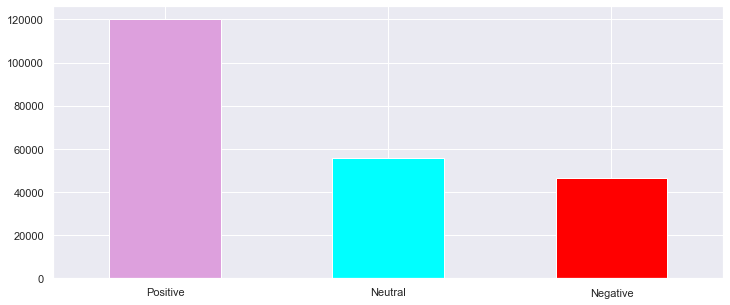

In [ ]:
result=df_t['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['plum','cyan', 'red']);

In [ ]:
# Split Datetime into Date and Time
import datetime
df_t['Time'],df_t['Date']= df_t['Datetime'].apply(lambda x:x.time()), df_t['Datetime'].apply(lambda x:x.date())

In [ ]:
# Reset index without removing default index
stockData.reset_index(inplace = True)

In [ ]:
for i, date in enumerate(stockData['Date']):
    if date == df_t['Date'][i]:
        df_t['Close'] = stockData['Close'][i]

/var/folders/34/mtw435zs29d_08f7638jrnv40000gp/T/ipykernel_2572/3743298544.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if date == df_t['Date'][i]:


In [ ]:
df_t = df_t[['Date', 'Time', 'Datetime', 'Text', 'compound', 'Sentiment', 'Close']]

In [ ]:
df_t

,Date,Time,Datetime,Text,compound,Sentiment,Close
0,2022-04-11,23:59:59,2022-04-11 23:59:59+00:00,Why? Because without P3s we wouldn’t have:\n\n...,0.0000,Neutral,975.929993
1,2022-04-11,23:59:54,2022-04-11 23:59:54+00:00,"@Tesla Didn't get to come out for it, unfortu...",0.5859,Positive,975.929993
2,2022-04-11,23:59:36,2022-04-11 23:59:36+00:00,@MarketRebels Tsla long 950P last friday,0.4588,Positive,975.929993
3,2022-04-11,23:59:27,2022-04-11 23:59:27+00:00,@CodingMark @Tesla @elonmusk Make em faster ti...,-0.4404,Negative,975.929993
4,2022-04-11,23:59:24,2022-04-11 23:59:24+00:00,@klwtts @Tesla @elonmusk @TeslaTruckClub @tesl...,0.7906,Positive,975.929993
...,...,...,...,...,...,...,...
222151,2022-03-12,00:00:59,2022-03-12 00:00:59+00:00,@cilerler @Tesla You’re not alone. Their servi...,-0.7471,Negative,975.929993
222152,2022-03-12,00:00:55,2022-03-12 00:00:55+00:00,@GerberKawasaki @Gfilche @neuralink @SpaceX @b...,0.6734,Positive,975.929993
222153,2022-03-12,00:00:52,2022-03-12 00:00:52+00:00,"TSLA, MRNA and NIO before powerful moves. \nSt...",0.7269,Positive,975.929993
222154,2022-03-12,00:00:28,2022-03-12 00:00:28+00:00,Top 5 trending #redditarmy #stocks in the last...,0.9442,Positive,975.929993


In [ ]:
stockData

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2022-03-14,780.609985,800.700012,756.039978,766.369995,766.369995,23717400
1,1,2022-03-15,775.270020,805.570007,756.570007,801.890015,801.890015,22280400
2,2,2022-03-16,809.000000,842.000000,802.260010,840.229980,840.229980,28009600
3,3,2022-03-17,830.989990,875.000000,825.719971,871.599976,871.599976,22194300
4,4,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33471400
5,5,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
6,6,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
7,7,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400
8,8,2022-03-24,1009.729980,1024.489990,988.799988,1013.919983,1013.919983,22973600
9,9,2022-03-25,1008.000000,1021.799988,997.320007,1010.640015,1010.640015,20677200


In [ ]:
sentiment_scores = []
df_t['Hour'] = df_t['Datetime'].dt.round('H').dt.hour
#sentiment_scores = df_t.groupby(pd.Grouper(level='Time', freq='H')).mean()
sentiment_scores = df_t.groupby(['Date', 'Hour'], as_index= False)['compound'].mean()

In [ ]:
df = pd.DataFrame(sentiment_scores)
compound = []
compound = [x*20 for x in df['compound']]
df.head(30)

,Date,Hour,compound,fourier 5,fourier 10,fourier 15,fourier 20
0,2022-03-12,0,0.195175,0.199232-0.001025j,0.187912-0.001025j,0.181391+0.001474j,0.191682+0.000907j
1,2022-03-12,1,0.244135,0.198586-0.001223j,0.188368-0.000450j,0.182891+0.001244j,0.194011+0.000895j
2,2022-03-12,2,0.217964,0.197939-0.001420j,0.188863+0.000129j,0.184474+0.000994j,0.196183+0.000857j
3,2022-03-12,3,0.140700,0.197289-0.001614j,0.189392+0.000707j,0.186122+0.000728j,0.198170+0.000795j
4,2022-03-12,4,0.187631,0.196639-0.001805j,0.189950+0.001280j,0.187817+0.000451j,0.199949+0.000710j
5,2022-03-12,5,0.293087,0.195988-0.001993j,0.190532+0.001843j,0.189544+0.000166j,0.201505+0.000606j
6,2022-03-12,6,0.096281,0.195337-0.002177j,0.191131+0.002394j,0.191285-0.000121j,0.202825+0.000483j
7,2022-03-12,7,0.252384,0.194686-0.002357j,0.191743+0.002927j,0.193021-0.000406j,0.203903+0.000348j
8,2022-03-12,8,0.261747,0.194036-0.002534j,0.192361+0.003440j,0.194737-0.000685j,0.204740+0.000202j
9,2022-03-12,9,0.162052,0.193389-0.002705j,0.192980+0.003928j,0.196415-0.000953j,0.205339+0.000050j


In [ ]:
df_t

,Date,Time,Datetime,Text,compound,Sentiment,Close,Hour
0,2022-04-11,23:59:59,2022-04-11 23:59:59+00:00,Why? Because without P3s we wouldn’t have:\n\n...,0.0000,Neutral,975.929993,0
1,2022-04-11,23:59:54,2022-04-11 23:59:54+00:00,"@Tesla Didn't get to come out for it, unfortu...",0.5859,Positive,975.929993,0
2,2022-04-11,23:59:36,2022-04-11 23:59:36+00:00,@MarketRebels Tsla long 950P last friday,0.4588,Positive,975.929993,0
3,2022-04-11,23:59:27,2022-04-11 23:59:27+00:00,@CodingMark @Tesla @elonmusk Make em faster ti...,-0.4404,Negative,975.929993,0
4,2022-04-11,23:59:24,2022-04-11 23:59:24+00:00,@klwtts @Tesla @elonmusk @TeslaTruckClub @tesl...,0.7906,Positive,975.929993,0
...,...,...,...,...,...,...,...,...
222151,2022-03-12,00:00:59,2022-03-12 00:00:59+00:00,@cilerler @Tesla You’re not alone. Their servi...,-0.7471,Negative,975.929993,0
222152,2022-03-12,00:00:55,2022-03-12 00:00:55+00:00,@GerberKawasaki @Gfilche @neuralink @SpaceX @b...,0.6734,Positive,975.929993,0
222153,2022-03-12,00:00:52,2022-03-12 00:00:52+00:00,"TSLA, MRNA and NIO before powerful moves. \nSt...",0.7269,Positive,975.929993,0
222154,2022-03-12,00:00:28,2022-03-12 00:00:28+00:00,Top 5 trending #redditarmy #stocks in the last...,0.9442,Positive,975.929993,0


In [ ]:
df_graph=df_t[['Datetime', 'Close', 'compound']]
#df_graph['sentiment score']=sentiment_scores
df_graph=df_graph.set_index('Datetime')
#df_graph=df_graph[df_graph['Close'].notna()]

In [ ]:
df_graph

,Close,compound
Datetime,,
2022-04-11 23:59:59+00:00,975.929993,0.0000
2022-04-11 23:59:54+00:00,975.929993,0.5859
2022-04-11 23:59:36+00:00,975.929993,0.4588
2022-04-11 23:59:27+00:00,975.929993,-0.4404
2022-04-11 23:59:24+00:00,975.929993,0.7906
...,...,...
2022-03-12 00:00:59+00:00,975.929993,-0.7471
2022-03-12 00:00:55+00:00,975.929993,0.6734
2022-03-12 00:00:52+00:00,975.929993,0.7269


In [ ]:
df.head()

,Date,Hour,compound,fourier 5,fourier 10,fourier 15,fourier 20
0,2022-03-12,0,0.195175,0.199232-0.001025j,0.187912-0.001025j,0.181391+0.001474j,0.191682+0.000907j
1,2022-03-12,1,0.244135,0.198586-0.001223j,0.188368-0.000450j,0.182891+0.001244j,0.194011+0.000895j
2,2022-03-12,2,0.217964,0.197939-0.001420j,0.188863+0.000129j,0.184474+0.000994j,0.196183+0.000857j
3,2022-03-12,3,0.140700,0.197289-0.001614j,0.189392+0.000707j,0.186122+0.000728j,0.198170+0.000795j
4,2022-03-12,4,0.187631,0.196639-0.001805j,0.189950+0.001280j,0.187817+0.000451j,0.199949+0.000710j


<AxesSubplot:xlabel='Date', ylabel='Close'>

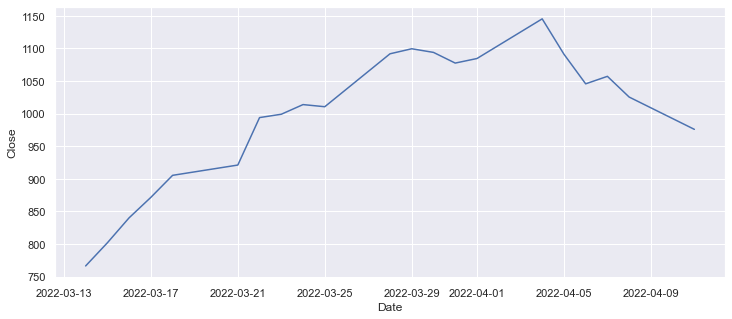

In [ ]:
# plot the sentiment data
sns.set(
    rc={'figure.figsize':(12,5)},
    style="darkgrid" # nicer layout
)
# and the tesla stock price
sns.lineplot(x=stockData['Date'], y=stockData['Close'])
sns.lineplot(secondary_y = sentiment)

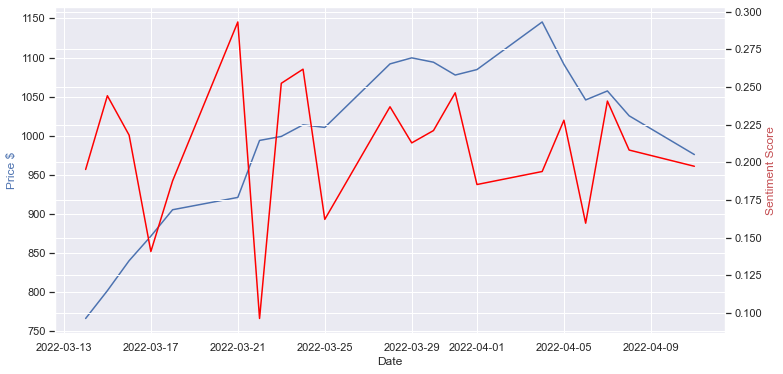

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax2 = ax1.twinx()
ax1.plot(stockData['Date'], stockData['Close'])
ax2.plot(stockData['Date'], stockData['compound'], color="red" )

ax1.set_xlabel('Date')
ax1.set_ylabel('Price $', color='b')
ax2.set_ylabel('Sentiment Score', color='r')

plt.show()

In [ ]:
# Smooth out the sentiment score using a fourier transform
close_fft = np.fft.fft(np.asarray(df['compound'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
fft_list = np.asarray(fft_df['fft'].tolist())

for num_ in [5, 10, 15, 20]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    df['fourier '+str(num_)]=np.fft.ifft(fft_list_m10)


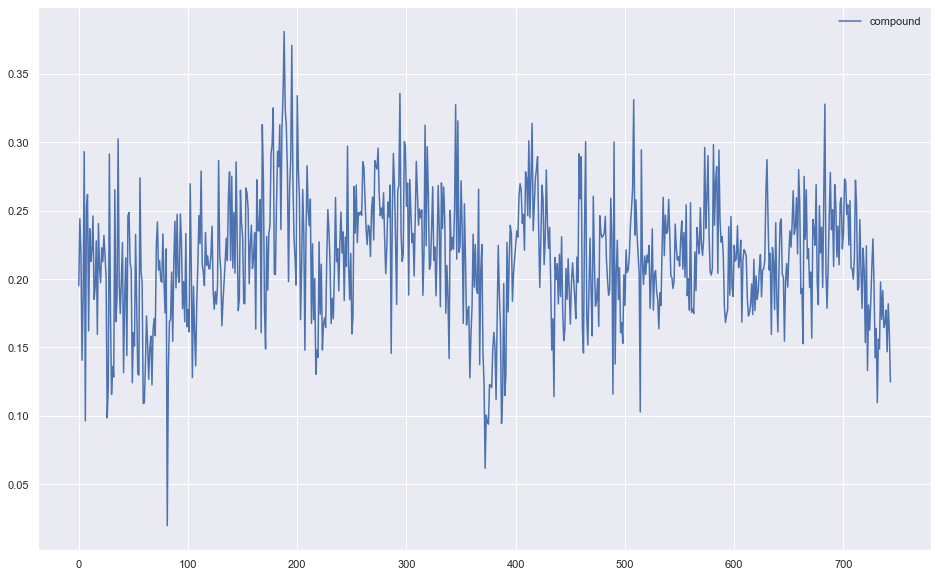

In [ ]:
df[['compound']].plot(figsize=(16, 10));

/Users/rregi/miniforge3/envs/tensorflow/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


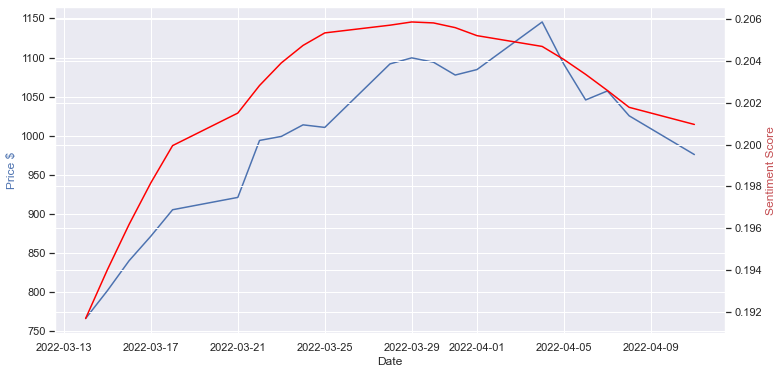

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax2 = ax1.twinx()
ax1.plot(stockData['Date'], stockData['Close'])
ax2.plot(stockData['Date'], stockData['fourier 20'], color="red" )

ax1.set_xlabel('Date')
ax1.set_ylabel('Price $', color='b')
ax2.set_ylabel('Sentiment Score', color='r')

plt.show()

In [ ]:
stockData['fourier 20'] = df['fourier 20']
stockData['compound'] = df['compound']
stockData['fourier 10'] = df['fourier 10']
stockData['fourier 15'] = df['fourier 15']

/Users/rregi/miniforge3/envs/tensorflow/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


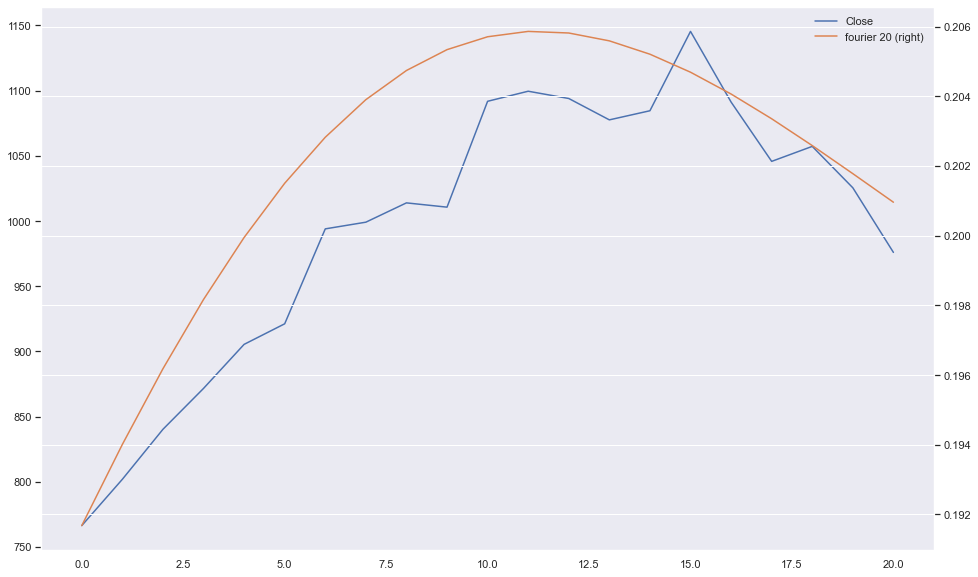

In [ ]:
stockData[['Close', 'fourier 20']].plot(secondary_y='fourier 20', figsize=(16, 10));

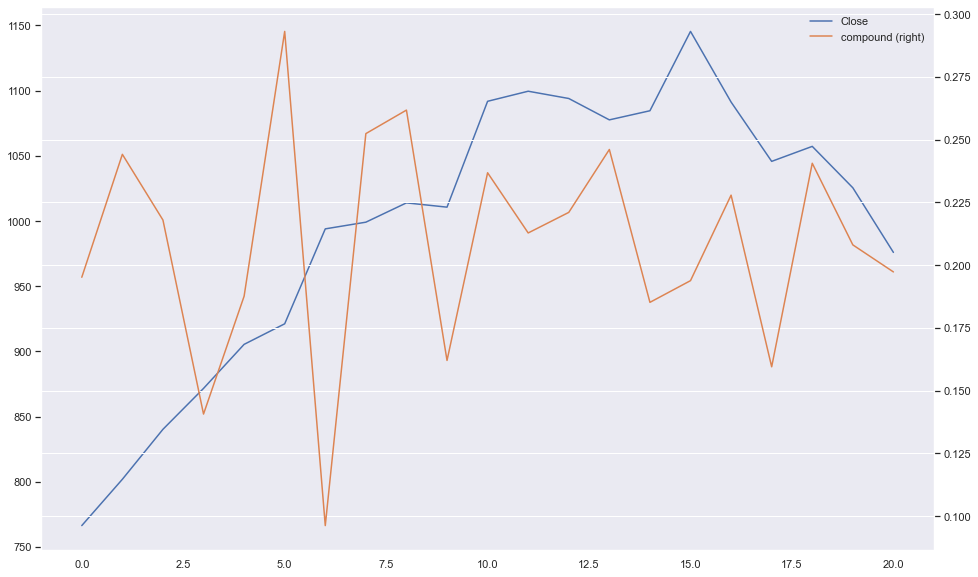

In [ ]:
stockData =
stockData[['Close', 'compound']].plot(secondary_y='compound', figsize=(16, 10));

/Users/rregi/miniforge3/envs/tensorflow/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


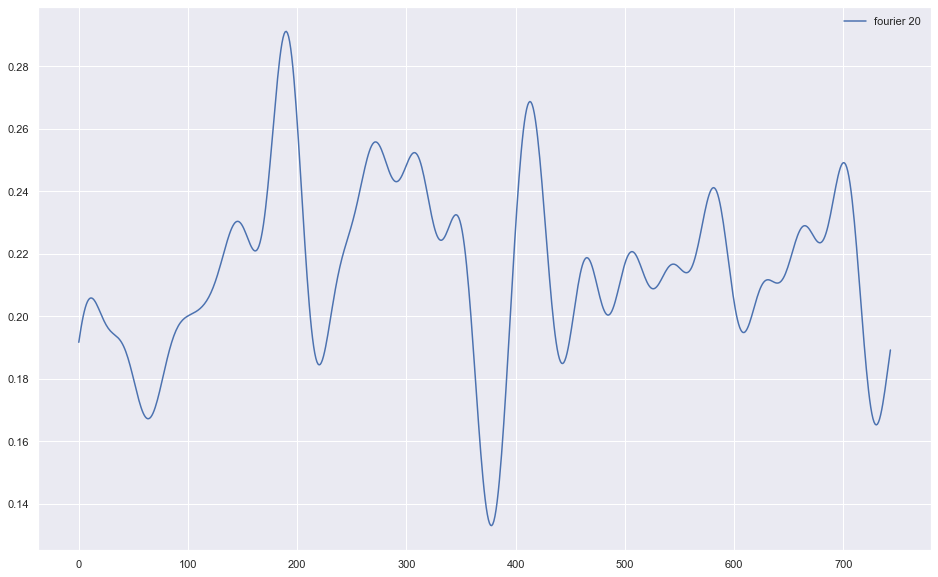

In [ ]:
df[['fourier 20']].plot(figsize=(16, 10));

In [ ]:
df

,compound,fourier 5,fourier 10,fourier 15,fourier 20
0,0.195175,0.199232-0.001025j,0.187912-0.001025j,0.181391+0.001474j,0.191682+0.000907j
1,0.244135,0.198586-0.001223j,0.188368-0.000450j,0.182891+0.001244j,0.194011+0.000895j
2,0.217964,0.197939-0.001420j,0.188863+0.000129j,0.184474+0.000994j,0.196183+0.000857j
3,0.140700,0.197289-0.001614j,0.189392+0.000707j,0.186122+0.000728j,0.198170+0.000795j
4,0.187631,0.196639-0.001805j,0.189950+0.001280j,0.187817+0.000451j,0.199949+0.000710j
...,...,...,...,...,...
739,0.177254,0.202404-0.000011j,0.186383-0.003713j,0.175651+0.002210j,0.178932+0.000599j
740,0.146824,0.201779-0.000216j,0.186575-0.003214j,0.176517+0.002127j,0.181491+0.000705j
741,0.181958,0.201148-0.000419j,0.186827-0.002692j,0.177537+0.002009j,0.184090+0.000791j
742,0.161228,0.200513-0.000622j,0.187137-0.002150j,0.178698+0.001860j,0.186683+0.000854j
